# Tercer punto. Ajuste de curvas
**Bancarrotas** (3.33 puntos). Los siguientes datos extraidos de Administrative Office of the U.S. Courts, representan el número de bancarrotas en miles entre los años 1988 y 2001.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
y = np.array([594.6,643.0,725.5,880.4,972.5,918.7,845.3,858.1,
                           1042.1,1317.0,1429.5,1392.0,1277.0,1386.6])
x = np.arange(8,22)

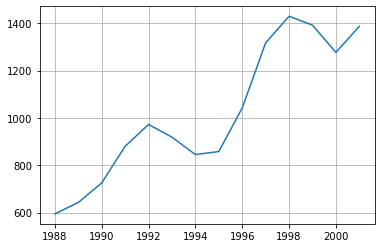

In [4]:
plt.plot(x+1980,y)
plt.grid()

1. Ajuste las bancarrotas con polinomios de grado 1, 3 y 5. Muestre los errores de forma gráfica, ¿Qué polinómio se ajusta mejor? (2.3 puntos).
2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste (0.5 puntos).
3. Usar el modelo para averiguar el número de bancarrotas a mediados de 1998 (es decir en 1998.5) y predecirlo para el año 2011. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación? (0.5 puntos).

In [1]:
sol = []
sol

[]

In [5]:
def f(x,beta):
    n = len(beta) - 1 
    X = np.array([x**i for i in range(n+1)]) 
    return beta@X

In [10]:
def obj(beta,x,y):
    n = len(beta) -1
    X = np.array([x**i for i in range(n+1)])
    f = beta@X
    return np.sum((y-f)**2)

In [11]:
import scipy.optimize as opt

In [12]:
N = 5
for n in range(N):
    beta0 = np.random.rand(n+2) 
    sol.append(opt.minimize(obj,beta0,args = (x,y)))

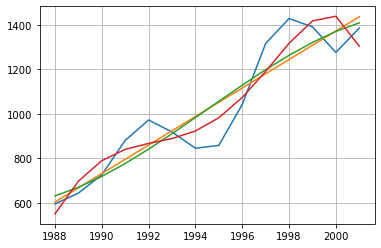

In [17]:
plt.plot(x+1980,y)
plt.plot(x+1980,f(x,sol[0].x))
plt.plot(x+1980,f(x,sol[2].x))
plt.plot(x+1980,f(x,sol[4].x))
plt.grid()

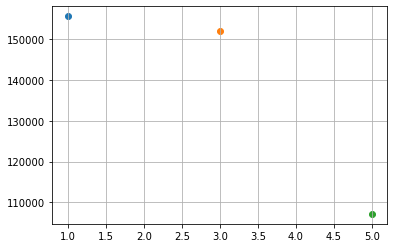

In [19]:
plt.scatter(1,sol[0].fun)
plt.scatter(3,sol[2].fun)
plt.scatter(5,sol[4].fun)
plt.grid()

Con ver las gráficas podemos llegar a la conclusion que el polinomo de grado 5 es el mas adecuado para los datos proporcionados.

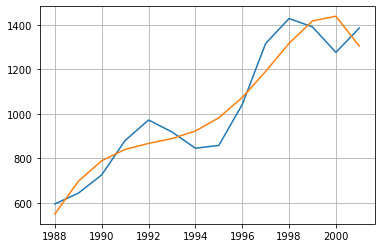

In [20]:
plt.plot(x+1980,y)
plt.plot(x+1980,f(x,sol[4].x))
plt.grid()

In [23]:
f(18.5,sol[4].x)

1374.3608905866859

In [25]:
f(31,sol[4].x)

-47413.69817868061

La interpolación es buena, y eso lo deducimos gracias a que se parece mucho al número de bancarrotas que hubo en el año de 1998.

En cambio para el año 2011, la extrapolación despues de analizar el número de bancarrotas que hubo nos arroja un resultado negativo. La cual nos hace pensar que fallaron en el ajuste que tenian planeado.